In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import matplotlib.font_manager as fm
fontprops = fm.FontProperties(family='monospace')

In [3]:
def load_distribution(file_name):
    """
    return x, distribution
    """
    df = pd.read_csv(file_name)
    dis_flat = df.to_dict("list")
    distribution = {}
    for s_all in dis_flat:
        if s_all[-4:] == "_ave":
            s = s_all[:-4]
            distribution[s] = {}
            distribution[s]["ave"] = np.array(dis_flat[s+"_ave"])
            distribution[s]["low"] = np.array(dis_flat[s+"_low"])
            distribution[s]["up" ] = np.array(dis_flat[s+"_up" ])
    return distribution

def get_color_dict_soft(state_list, cutoff, colors):
    """
    generate a dictionary that can do
    state -> color
    """
    line_style = {0:"solid", 1:"dotted", 2:"dotted", 3:"dotted", 4:"dotted"}
    
    s_list = []
    for state_dict in state_list:
        for s in state_dict:
            if (not (s in s_list)) and np.any(state_dict[s]["ave"] > cut_off):
                s_list.append(s)
                
    color_style_dict = {}
    count = {i:-1 for i in set(line_style.values())}
    for s in s_list:
        n_W = s[2:-2].count("W")+ s[2:-2].count("C")
        style = line_style[n_W]
        count[style] += 1
        color_style_dict[s] = (colors[count[style]], style)
    return color_style_dict

def plot_hre(ax, state_dict, x, cut_off, c_map, xlim=None, ylim=(-0.01,1.0),  prop=None ):
    for s in state_dict:
        if np.any(state_dict[s]["ave"] > cut_off):
            color,style = c_map[s]
            ax.errorbar(x, state_dict[s]["ave"], 
                        yerr=[state_dict[s]["low"],
                              state_dict[s]["up"]], 
                        label=s,
                        color=color,
                        linestyle=style
                       )
    ax.legend(prop=prop)
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    ax.grid()

In [4]:
cmap = plt.get_cmap('tab20')
colors_20 = [cmap(i) for i in range(20)]
cmap = plt.get_cmap('tab10')
colors_10 = [cmap(i) for i in range(10)]
xlim = (1.01, 0.57)
ylim_re = (-0.01,1.0)

Text(0.5, 0, 'Charge Scaling Factor')

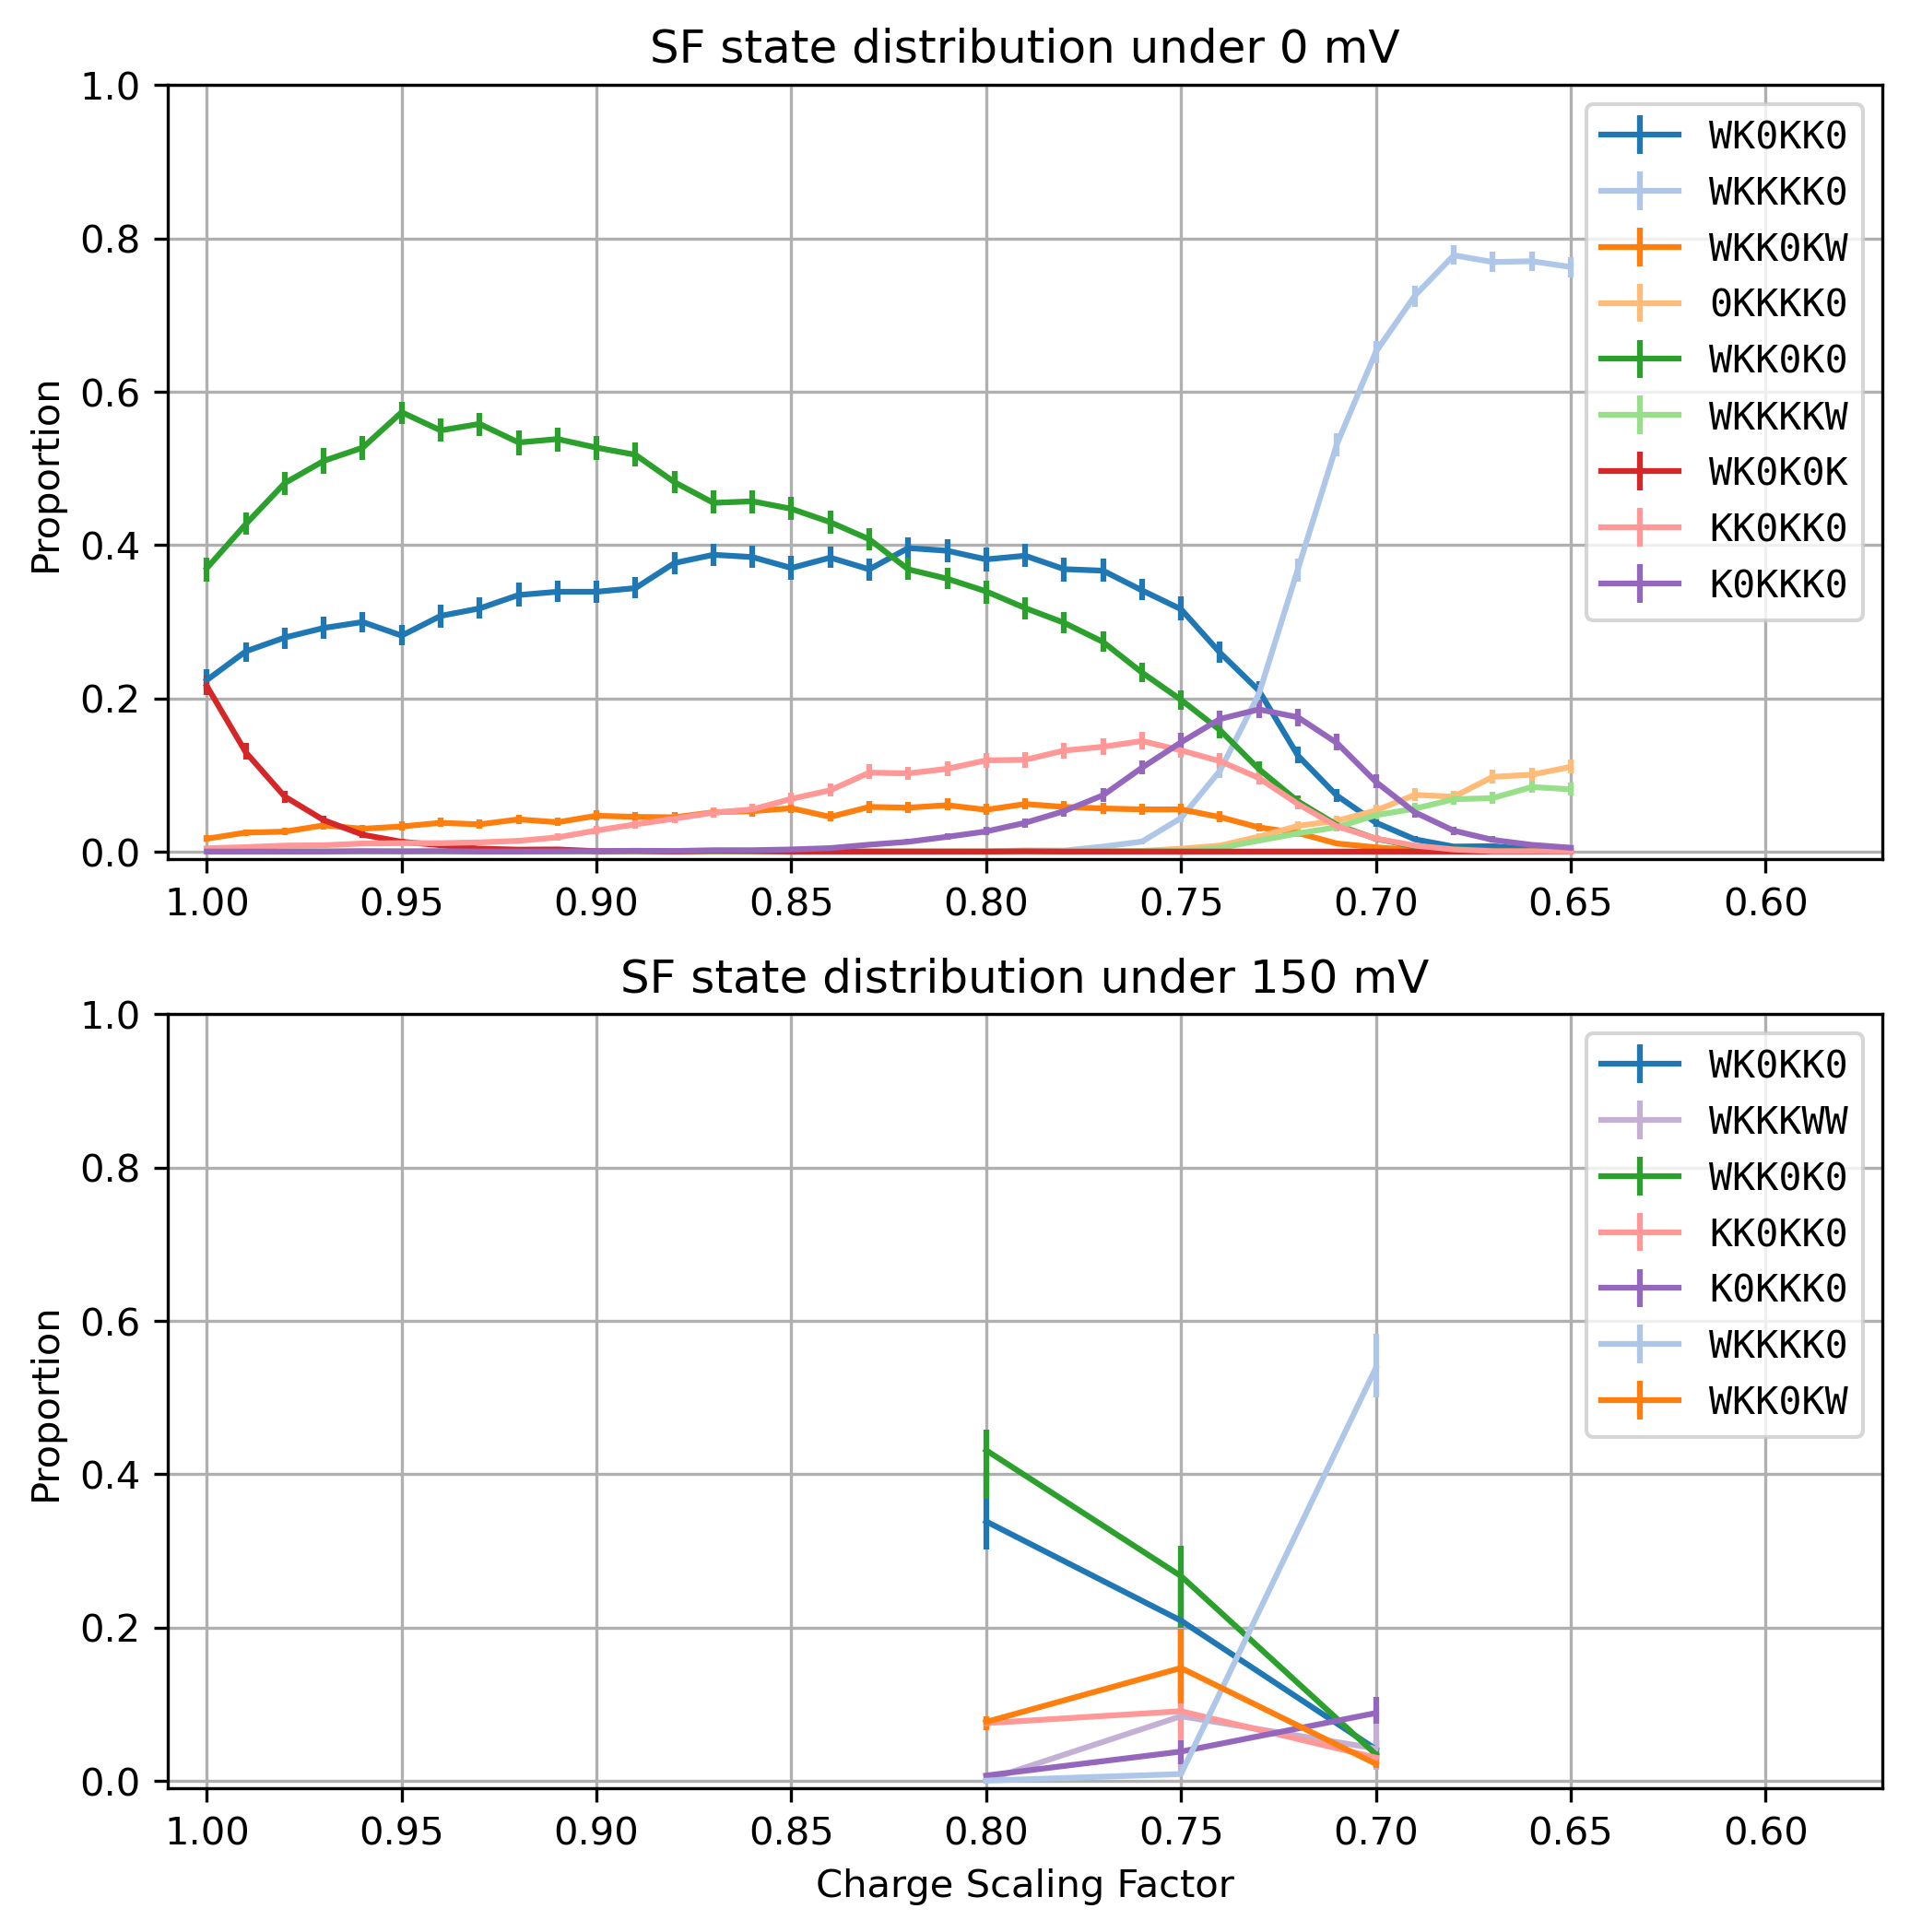

In [5]:
# You need to 
NaK2K_charge = [
    load_distribution("../test/05-HRE/01-charmm-charge/distribution/output.csv"), # HRE under 0 mV
    load_distribution("../test/06-multi_rep/01-charmm-charge/distribution/output.csv"), # MD under 150 mV
]


cut_off=0.06  # If the occurance is under this, the line will not be plotted
c_map = get_color_dict_soft(NaK2K_charge, cut_off, colors_20)
fix, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), dpi=300)


x_1=np.arange(1.0, 0.645, -0.01)
plot_hre(ax1, NaK2K_charge[0], x_1, cut_off, c_map=c_map, xlim=xlim, ylim=ylim_re, prop=fontprops)
x_2 = [0.80, 0.75, 0.70]
plot_hre(ax2, NaK2K_charge[1], x_2, cut_off, c_map=c_map, xlim=xlim, ylim=ylim_re, prop=fontprops)

ax1.set_title("SF state distribution under 0 mV")
ax2.set_title("SF state distribution under 150 mV")

ax1.set_ylabel("Proportion")
ax2.set_ylabel("Proportion")
ax2.set_xlabel("Charge Scaling Factor")




